<a href="https://colab.research.google.com/github/Modnarudom/modProject/blob/main/ISLR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

## Q8

*    (a) Use the sm.OLS() function to perform a simple linear regression
 with mpg as the response and horsepower as the predictor. Use
 the summarize() function to print the results. Comment on the
 output. For example

  1. Is there a relationship between the predictor and the re
sponse?
  2. How strong is the relationship between the predictor and
 the response?
  3. Is the relationship between the predictor and the response
 positive or negative?
  4. What is the predicted mpg associated with a horsepower of
 98? What are the associated 95% confidence and prediction
 intervals?


* (b) Plot the response and the predictor in a new set of axes ax. Use
 the ax.axline() method or the abline() function defined in the
 lab to display the least squares regression line.

* (c) Produce some of diagnostic plots of the least squares regression
 fit as described in the lab. Comment on any problems you see
 with the fit.



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 67.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 77.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d438bb69542d6fbfa923a48cc9b9372e601d3ba7a345375a00b56c1872b73f93
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [10]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


###(a)

<Axes: xlabel='horsepower', ylabel='mpg'>

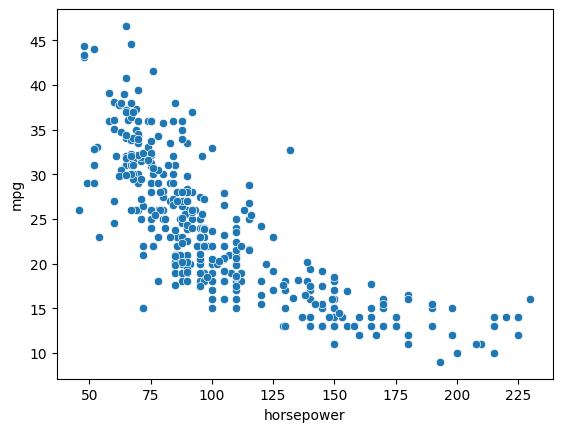

In [11]:
sns.scatterplot(data = Auto, x = 'horsepower', y = 'mpg')

In [12]:
mod = ols("mpg ~ horsepower", data = Auto).fit()

In [13]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        14:14:43   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [14]:
prediction = mod.predict({"horsepower": 98})
print(prediction)

0    24.467077
dtype: float64


calculate 95% confident interval [ref](https://www.statology.org/confidence-interval-mean/#:~:text=We%20use%20the%20following%20formula%20to%20calculate%20a,mean%3A%20Confidence%20Interval%20%3D%20x%20%2B%2F-%20z%2A%20%28s%2F%E2%88%9An%29)


In [15]:
#find CI
from math import sqrt
x = Auto["horsepower"]
se = np.var(x)/np.sum((x-np.mean(x))**2)
print(se)
mod.params[1]+2*se

0.002551020408163265


-0.15274269253732703

(1) From null hypothesis of $H_{0}$ : There is no relationship between **X** and **Y** ($H_{0} : \beta_{1} = 0$) <br>

versus alternative hypothesis $H_{a}$ : There is some relationship between **X** and **Y** ($H_{a} : \beta_{1} \ne 0$)<br>

If we suspect that the p-value for horsepower is close to 0, we would reject the null hypothesis ($H_{0}: \beta_{1} = 0$),<br>

indicating a significant relationship between mpg and horsepower.

(2) $R^{2}$ (R-squared) has value 0.606 or 60.6% that mpg is explained by horsepower

(3) The relationship between mpg and horsepower is negative ($\beta_{1} = -0.1578$)

###(b)

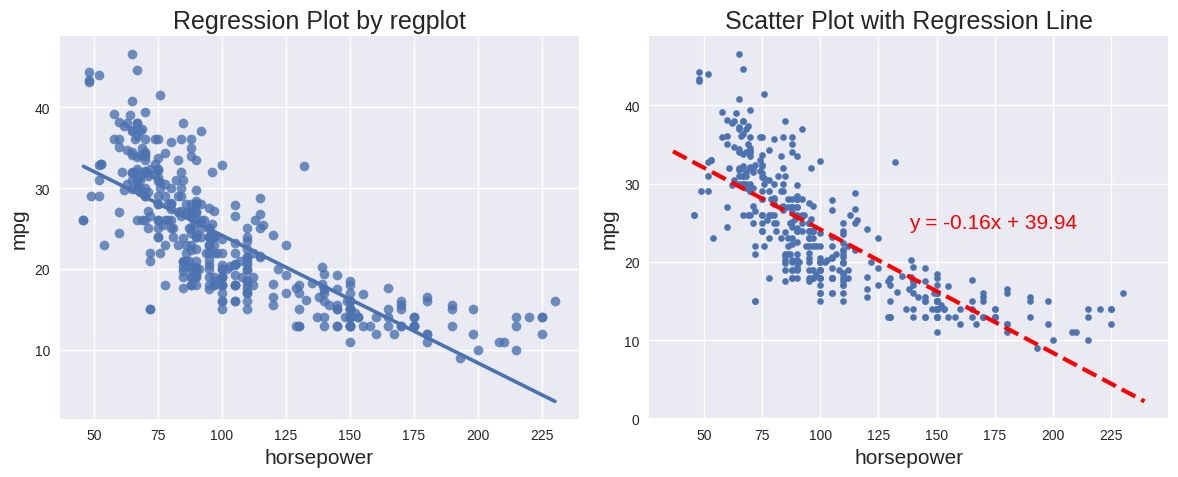

In [45]:
#use regplot from seaborn
fig,(ax1,ax2) = plt.subplots(1,2, figsize =(12,5))
sns.regplot (ax=ax1, data = Auto, x = "horsepower", y = "mpg",ci =None)
#plot scatter and affine equation of f_hat_x
def affine(ax, b, m, *args, **kwargs):
  xlim = ax.get_xlim()
  ylim= [xlim[0]*m +b, m*xlim[1] +b]
  ax.plot(xlim, ylim, *args, **kwargs)
  # Add the equation as text to the graph
  equation = f'y = {mod.params[1]:.2f}x + {mod.params[0]:.2f}'
  ax.annotate(equation, xy=(0.5, 0.5), xycoords='axes fraction', fontsize=15, color='red')
ax2= Auto.plot.scatter("horsepower", "mpg",ax = ax2)
affine(ax2,
       mod.params[0],
       mod.params[1],
       "r--",
       linewidth = 3
       )
ax1.set_title("Regression Plot by regplot")
ax2.set_title("Scatter Plot with Regression Line")
# Adjust the layout to prevent overlapping
plt.tight_layout()
# Show the figure
plt.show()

###(c)
Diagnostic plots are essential for assessing the goodness of fit in a linear regression model. They help identify potential issues with the model and evaluate the assumptions underlying linear regression. Common diagnostic plots include:

1. Residual vs. Fitted Values Plot:
This plot checks for linearity and homoscedasticity (constant variance). Ideally, residuals should be randomly scattered around zero, with no discernible pattern. Any distinct patterns or trends in this plot can indicate a problem with the linear assumption.

2. Normal Q-Q Plot:
A Normal Quantile-Quantile plot assesses whether the residuals are normally distributed. If the residuals deviate significantly from a straight line, it suggests a departure from normality.

3. Residual vs. Predictor Plot:
This plot checks for non-linearity and identifies potential outliers. If you see a pattern or structure in this plot, it may suggest that the model is missing some important non-linear relationships.

4. Leverage-Residuals Plot:
The Leverage vs. Residuals plot helps detect influential data points and outliers. Points with high leverage values or large standardized residuals could have a substantial impact on the model fit.

5. Cook's Distance Plot:
Cook's Distance is used to identify influential observations that might affect the regression coefficients. A large Cook's distance indicates that removing that observation would substantially change the model.

6. Scale-Location Plot (Spread-Location Plot):
This plot helps assess homoscedasticity. Ideally, it should produce a roughly horizontal line with no noticeable pattern.

In [59]:
 #fittedvalues (needa constanttermforintercept)
 mod_fitted_y= mod.fittedvalues
 #mod residuals
 mod_residuals= mod.resid
 #normalized residuals
 mod_norm_residuals =mod.get_influence().resid_studentized_internal
 #absolutesquarednormalizedresiduals
 mod_norm_residuals_abs_sqrt= np.sqrt(np.abs(mod_norm_residuals))
 #absoluteresiduals
 mod_abs_resid= np.abs(mod_residuals)
 #leverage, from statsmodsinternals
 mod_leverage= mod.get_influence().hat_matrix_diag
 #cook'sdistance,from statsmodsinternals
 mod_cooks= mod.get_influence().cooks_distance[0]

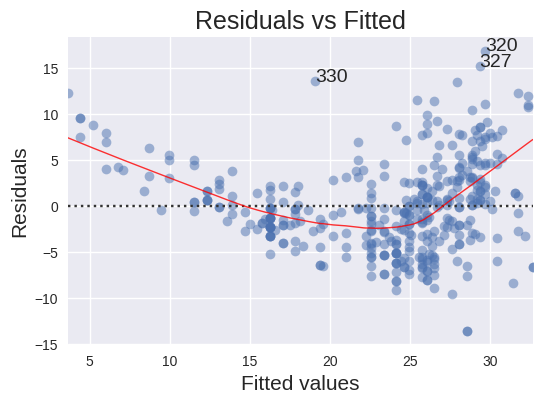

In [64]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(4)
plot_lm_1.set_figwidth(6)
plot_lm_1.axes[0] = sns.residplot(x=mod_fitted_y,y=Auto.mpg, lowess=True,scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
# annotations
abs_resid = mod_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
  plot_lm_1.axes[0].annotate(i,
  xy=(mod_fitted_y[i],
  mod_residuals[i]));

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


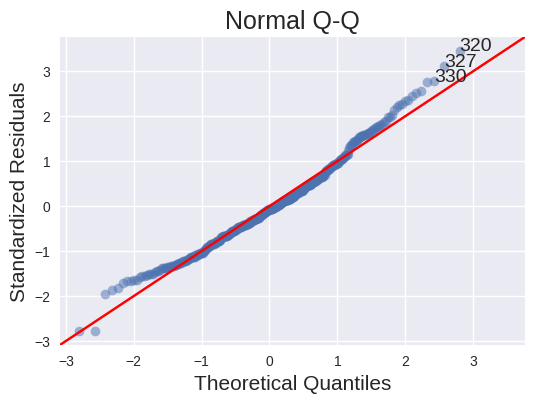

In [66]:
QQ = ProbPlot(mod_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(4)
plot_lm_2.set_figwidth(6)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(mod_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
  plot_lm_2.axes[0].annotate(i,
  xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
  mod_norm_residuals[i]));


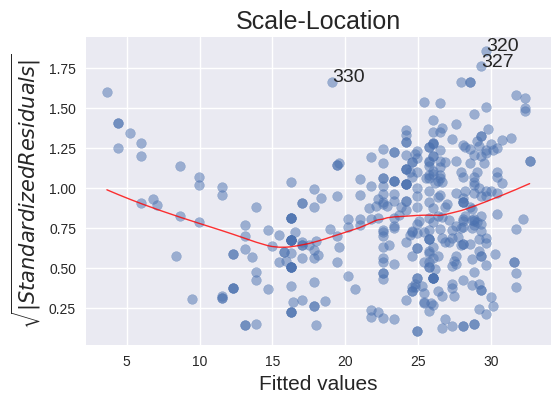

In [67]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(4)
plot_lm_3.set_figwidth(6)
plt.scatter(mod_fitted_y, mod_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(x=mod_fitted_y, y=mod_norm_residuals_abs_sqrt,scatter=False,ci=False,lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(mod_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
  xy=(mod_fitted_y[i],
  mod_norm_residuals_abs_sqrt[i]));

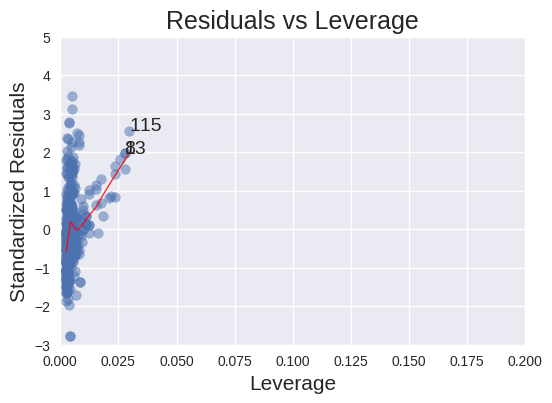

In [70]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(4)
plot_lm_4.set_figwidth(6)
plt.scatter(mod_leverage, mod_norm_residuals, alpha=0.5)
sns.regplot(x=mod_leverage,y= mod_norm_residuals,
scatter=False,
ci=False,
lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flip(np.argsort(mod_cooks), 0)[:3]
for i in leverage_top_3:
  plot_lm_4.axes[0].annotate(i,
  xy=(mod_leverage[i],
  mod_norm_residuals[i]))
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
  x = x_range
  y = formula(x)
  plt.plot(x, y, label=label, lw=1, ls='--', color='red')
  p = len(mod.params) # number of mod parameters
  graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
  np.linspace(0.001, 0.200, 50),
  'Cook\'s distance') # 0.5 line
  graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
  np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');
